# Letter recognition (small size)

> Indeed, I once even proposed that the toughest challenge facing AI workers is to answer the question: “What are the letters ‘A’ and ‘I’? - [Douglas R. Hofstadter](https://web.stanford.edu/group/SHR/4-2/text/hofstadter.html) (1995)


## notMNIST


Data source: [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) (you need to download `notMNIST_small.mat` file):

![](http://yaroslavvb.com/upload/notMNIST/nmn.png)

> some publicly available fonts and extracted glyphs from them to make a dataset similar to MNIST. There are 10 classes, with letters A-J taken from different fonts.

> Approaching 0.5% error rate on notMNIST_small would be very impressive. If you run your algorithm on this dataset, please let me know your results.


## So, why not MNIST?

Many introductions to image classification with deep learning start with MNIST, a standard dataset of handwritten digits. This is unfortunate. Not only does it not produce a “Wow!” effect or show where deep learning shines, but it also can be solved with shallow machine learning techniques. In this case, plain k-Nearest Neighbors produces more than 97% accuracy (or even 99.5% with some data preprocessing!). Moreover, MNIST is not a typical image dataset – and mastering it is unlikely to teach you transferable skills that would be useful for other classification problems

> Many good ideas will not work well on MNIST (e.g. batch norm). Inversely many bad ideas may work on MNIST and no[t] transfer to real [computer vision]. - [François Chollet’s tweet](https://twitter.com/fchollet/status/852594987527045120)

In [ ]:
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat

--2023-09-18 00:59:19--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117586976 (112M)
Saving to: ‘notMNIST_small.mat’

notMNIST_small.mat  100%[===================>] 112.14M  57.4MB/s    in 2.0s    

2023-09-18 00:59:21 (57.4 MB/s) - ‘notMNIST_small.mat’ saved [117586976/117586976]



In [ ]:
import matplotlib.pyplot as plt
from scipy import io
import numpy as np

## Data Loading

In [ ]:
data = io.loadmat('notMNIST_small.mat')

data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Aug 10 11:38:32 2011',
 '__version__': '1.0',
 '__globals__': [],
 'images': array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   1.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 215., ...,   0., 160., 124.],
         [255.,   0., 227., ...,   0., 122.,  72.],
         [255.,   0., 156., ...,   0.,   0.,  12.]],
 
        [[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,  19.,   0., ...,   0.,   0.,   0.],
         [  0.,  93.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 255., ...,   0., 255., 255.],
         [255.,   0., 110., ...,   0., 206., 227.],
         [255.,   0.,  21., ...,   0.,   0.,  63.]],
 
        [[  0.,   3.,   0., ...,   0.,   0.,   0.],
         [  0., 167.,   0., ...,   0.,   0.,   0.],
         [  0., 255.,   0., ...,   1.,   1.,   0.],
         ...,
         [255.,   0., 223.

In [ ]:
x = data['images']
y = data['labels']

In [ ]:
x.shape, y.shape

((28, 28, 18724), (18724,))

In [ ]:
resolution = 28
classes = 10

x = np.transpose(x, (2, 0, 1))
print(x.shape)
x = x.reshape( (-1, resolution, resolution, 1) )

(18724, 28, 28)


In [ ]:
# sample, x, y, channel
x.shape, y.shape

((18724, 28, 28, 1), (18724,))

* 데이터 살펴보기

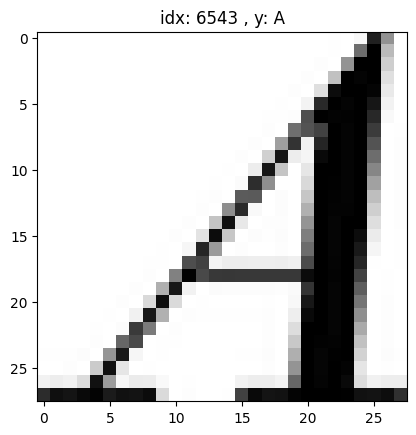

In [ ]:
rand_i = np.random.randint(0, x.shape[0])

plt.title( f'idx: {rand_i} , y: {"ABCDEFGHIJ"[ int(y[rand_i]) ]}' )
plt.imshow( x[rand_i, :, :, 0], cmap='Greys' )
plt.show()

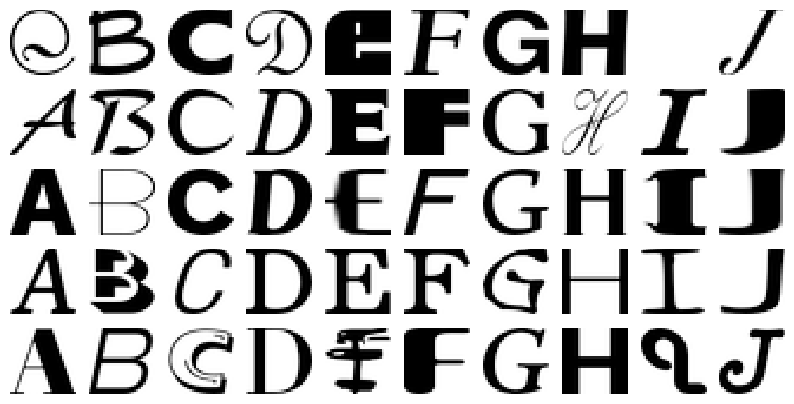

In [ ]:
rows = 5
fig, axes = plt.subplots(rows, classes, figsize=(classes,rows))

for letter_id in range(classes) :
    letters = x[y==letter_id]      # 0부터 9까지 각 숫자에 맞는 array가 letters에 들어간다.
    letters_len = len(letters)

    for row_i in range(rows) :
        axe = axes[row_i, letter_id]
        axe.imshow( letters[np.random.randint(letters_len)], cmap='Greys', interpolation='none')
        axe.axis('off')

## Data Preprocessing

* Data split

    - training set : test set = 8 : 2
    - 재연을 위한 난수 고정 : 2023

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=2023)
train_x.shape, train_y.shape

((14979, 28, 28, 1), (14979,))

* Scaling

    - min-max scaling

In [ ]:
max_n, min_n = train_x.max(), train_x.min()
max_n, min_n

(255.0, 0.0)

In [ ]:
train_x = (train_x - min_n)/(max_n - min_n)
test_x = (test_x - min_n)/(max_n - min_n)
train_x.max(), train_x.min()

(1.0, 0.0)

* One-hot encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
class_n = len(np.unique(train_y))
class_n

10

In [ ]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

* Data shape 재확인

In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((14979, 28, 28, 1), (14979, 10), (3745, 28, 28, 1), (3745, 10))

## Modeling : CNN

- 조건
    1. Sequential API, Functiona API 중 택일.
    2. [이 구조를 미니 버전으로 활용해봐도 좋다.](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99DFA5415B38AC752E)
    3. DropOut, BatchNormalization 등의 기능도 같이 활용해보자.
    4. Early Stopping을 사용할 것.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten
from tensorflow.keras.backend import clear_session

In [ ]:
## 세션 클리어
clear_session()
## 레이어 엮기
X = Input(shape=(28,28,1))
H = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(X)
H = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = BatchNormalization()(H)
H = MaxPool2D(pool_size=(2,2), strides=(2,2))(H)
H = Dropout(0.5)(H)

H = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(H)
H = BatchNormalization()(H)
H = MaxPool2D(pool_size=(2,2), strides=(2,2))(H)
H = Dropout(0.5)(H)

H = Flatten()(H)
H = Dense(1024, activation='relu')(H)
H = BatchNormalization()(H)

Y = Dense(10, activation='softmax')(H)
## 모델 시작과 끝 지정
model=Model(X, Y)
## 모델 컴파일
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics='accuracy')

* Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

* .fit( )

In [ ]:
model.fit(train_x, train_y, epochs=1000, callbacks=[es], validation_split=0.2, verbose=1)

Epoch 1/1000
375/375 [==============================] - 20s 16ms/step - loss: 0.6052 - accuracy: 0.8424 - val_loss: 0.4111 - val_accuracy: 0.8882
Epoch 2/1000
375/375 [==============================] - 4s 11ms/step - loss: 0.3191 - accuracy: 0.9074 - val_loss: 0.2457 - val_accuracy: 0.9383
Epoch 3/1000
375/375 [==============================] - 4s 11ms/step - loss: 0.2450 - accuracy: 0.9271 - val_loss: 0.2368 - val_accuracy: 0.9376
Epoch 4/1000
375/375 [==============================] - 6s 15ms/step - loss: 0.2040 - accuracy: 0.9377 - val_loss: 0.2096 - val_accuracy: 0.9396
Epoch 5/1000
375/375 [==============================] - 5s 13ms/step - loss: 0.1873 - accuracy: 0.9415 - val_loss: 0.2235 - val_accuracy: 0.9379
Epoch 6/1000
375/375 [==============================] - 5s 12ms/step - loss: 0.1600 - accuracy: 0.9512 - val_loss: 0.2439 - val_accuracy: 0.9389
Epoch 7/1000
375/375 [==============================] - 5s 13ms/step - loss: 0.1452 - accuracy: 0.9528 - val_loss: 0.2351 - val_a

* .evaluate( )

In [ ]:
model.evaluate(test_x, test_y)

118/118 [==============================] - 1s 5ms/step - loss: 0.1961 - accuracy: 0.9372


[0.19611294567584991, 0.9372496604919434]

* .predict( )

In [ ]:
y_pred = model.predict(test_x)

118/118 [==============================] - 0s 2ms/step


In [ ]:
# 원핫 인코딩 한 것을 다시 묶어주는 코드
# 평가 지표 및 실제 데이터 확인을 위해 필요

y_pred_arg = np.argmax(y_pred, axis=1)
test_y_arg = np.argmax(test_y, axis=1)

* 평가 지표

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(test_y_arg, y_pred_arg)

0.9372496662216289

In [ ]:
print( classification_report(test_y_arg, y_pred_arg) )

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       357
           1       0.90      0.94      0.92       365
           2       0.96      0.94      0.95       374
           3       0.95      0.93      0.94       392
           4       0.97      0.93      0.95       406
           5       0.98      0.94      0.96       377
           6       0.92      0.96      0.94       372
           7       0.94      0.95      0.95       374
           8       0.91      0.92      0.92       385
           9       0.94      0.92      0.93       343

    accuracy                           0.94      3745
   macro avg       0.94      0.94      0.94      3745
weighted avg       0.94      0.94      0.94      3745



## Visualization

* 실제 데이터 확인

idx = 1442
해당 인덱스의 이미지는 J
모델의 예측 : J
모델의 클래스별 확률 : 
-------------------
A 0.0
B 0.0
C 0.0
D 0.0
E 0.0
F 0.0
G 0.0
H 0.0
I 7.0
J 92.0
정답


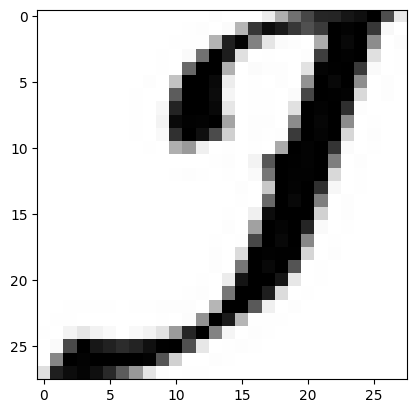

In [ ]:
letters_str = "ABCDEFGHIJ"

rand_idx = np.random.randint(0, len(y_pred_arg))
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측 : {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate(letters_str) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx], cmap='Greys')
plt.show()

* 틀린 이미지만 확인해보기

In [ ]:
temp = (test_y_arg == y_pred_arg)
false_idx = np.where(temp==False)[0]
false_len = len(false_idx)
false_len

235

idx = 101
해당 인덱스의 이미지는 B
모델의 예측 : E
모델의 클래스별 확률 : 
-------------------
A 0.0
B 28.0
C 0.0
D 0.0
E 70.0
F 0.0
G 0.0
H 0.0
I 0.0
J 0.0
땡


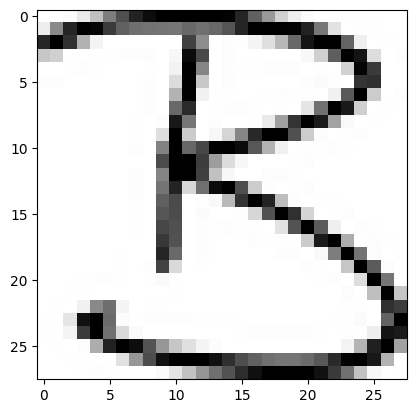

In [ ]:
letters_str = "ABCDEFGHIJ"

rand_idx = false_idx[np.random.randint(0, false_len)]
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측 : {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate(letters_str) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx], cmap='Greys')
plt.show()